In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [25]:
df = pd.read_csv("AirPassengers.csv", parse_dates=['Month'], index_col='Month')

print("Data Head:\n", df.head())

Data Head:
             #Passengers
Month                  
1949-01-01          112
1949-02-01          118
1949-03-01          132
1949-04-01          129
1949-05-01          121


In [26]:
print("\nData Summary:\n")
print(df.info())


Data Summary:

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   #Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB
None


In [27]:
df.describe(include='all')

,#Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [31]:
df = df.rename(columns={'#Passengers' : 'Passengers'})

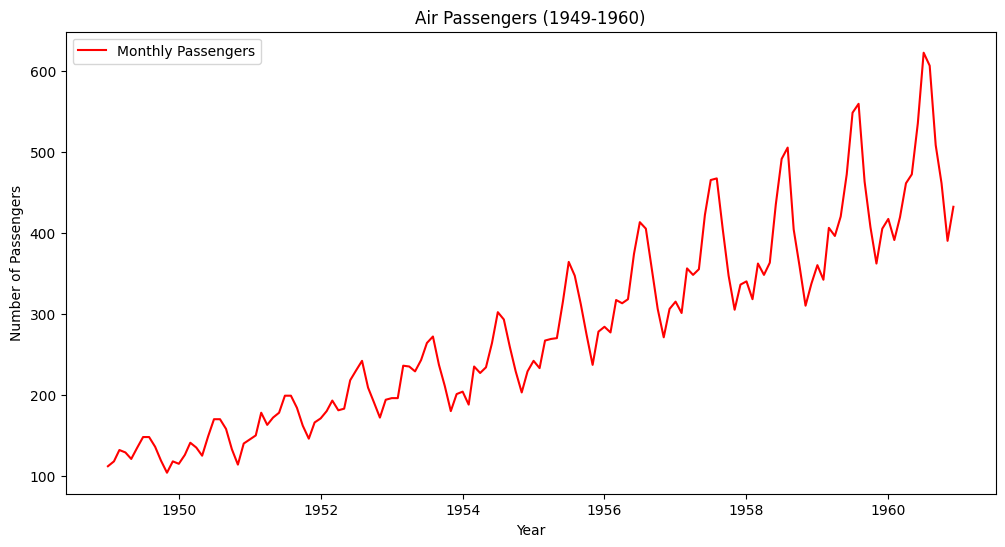

In [33]:
plt.figure(figsize=(12,6))
plt.plot(df['Passengers'], label='Monthly Passengers',color='red')
plt.title('Air Passengers (1949-1960)')
plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()


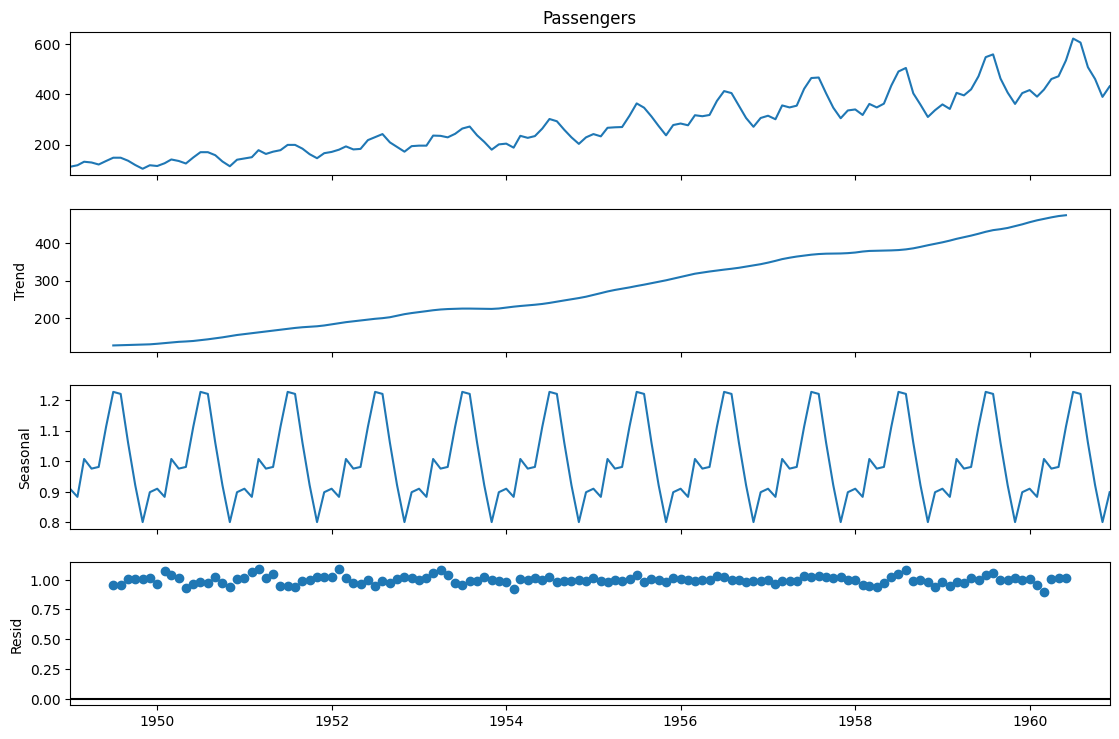

In [34]:
decomposition = seasonal_decompose(df['Passengers'], model='multiplicative')

fig = decomposition.plot()
fig.set_size_inches(12, 8)
plt.show()


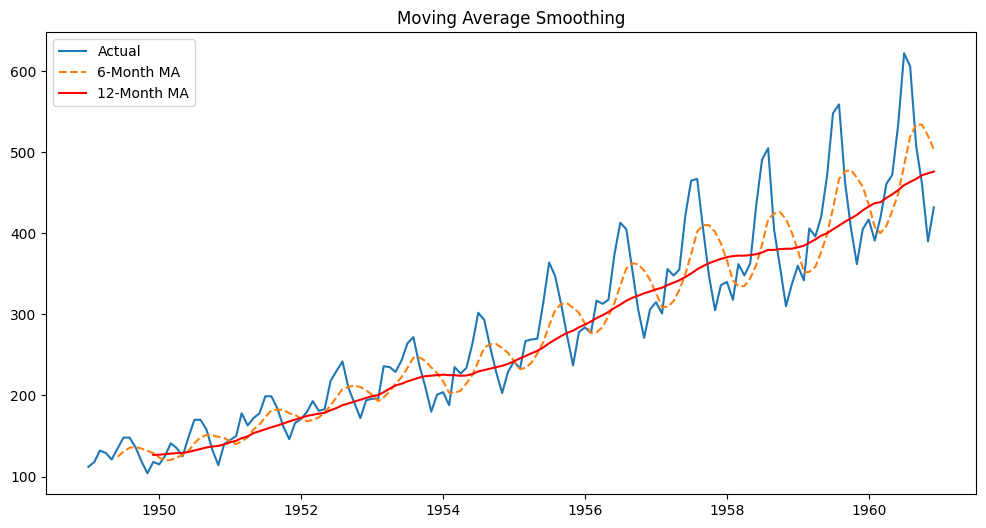

In [44]:
df['MA_6'] = df['Passengers'].rolling(window=6).mean()
df['MA_12'] = df['Passengers'].rolling(window=12).mean()

plt.figure(figsize=(12,6))
plt.plot(df['Passengers'], label='Actual')
plt.plot(df['MA_6'], label='6-Month MA', linestyle='--')
plt.plot(df['MA_12'], label='12-Month MA', color='red')
plt.title('Moving Average Smoothing')
plt.legend()
plt.show()

In [48]:
train = df.iloc[:-12]
test = df.iloc[-12:]

model = ARIMA(train['Passengers'], order=(2,1,1), seasonal_order=(1,1,1,12))
result = model.fit()

forecast = result.forecast(steps=12)

rmse = np.sqrt(mean_squared_error(test['Passengers'], forecast))
print(f"RMSE: {rmse:.2f} passengers")


C:\Users\Mohammed Zaid\Desktop\mini project\lungs\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Mohammed Zaid\Desktop\mini project\lungs\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Mohammed Zaid\Desktop\mini project\lungs\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Mohammed Zaid\Desktop\mini project\lungs\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Mohammed Zaid\Desktop\

RMSE: 21.16 passengers


C:\Users\Mohammed Zaid\Desktop\mini project\lungs\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


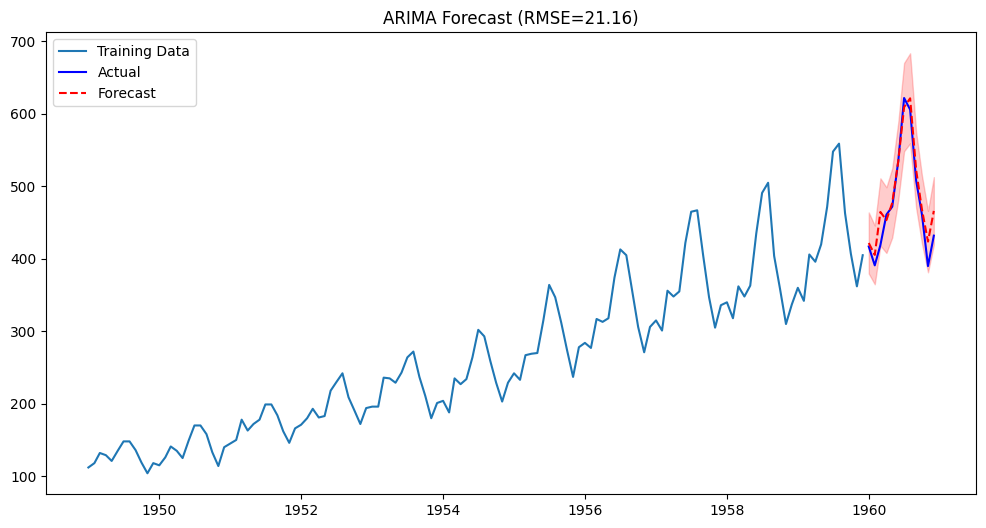

In [54]:
plt.figure(figsize=(12,6))
plt.plot(train.index, train['Passengers'], label='Training Data')
plt.plot(test.index, test['Passengers'], label='Actual', color='blue')
plt.plot(test.index, forecast, label='Forecast', color='red', linestyle='--')
plt.fill_between(test.index, forecast*0.9, forecast*1.1, alpha=0.2, color='red')
plt.title(f'ARIMA Forecast (RMSE={rmse:.2f})')
plt.legend()
plt.show()


In [55]:
df.to_csv("AirPassengers_cleaned.csv", index=True)